### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#additional visuzalization libraries

import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import missingno as msno

### 2.  Import data

In [4]:
data = pd.read_csv('Ecommerce Customers')

In [5]:
data.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.


### 3. EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [8]:
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style('whitegrid')

<AxesSubplot:>

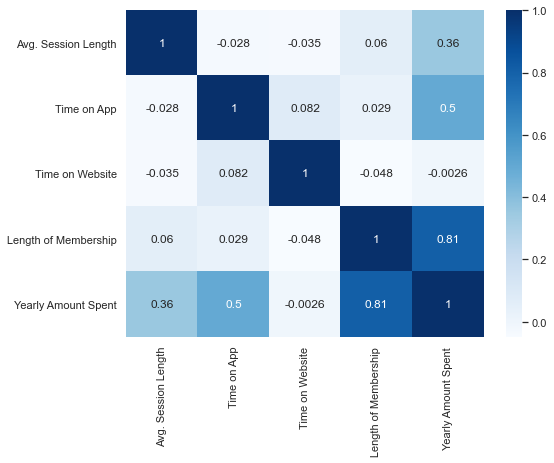

In [9]:
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')

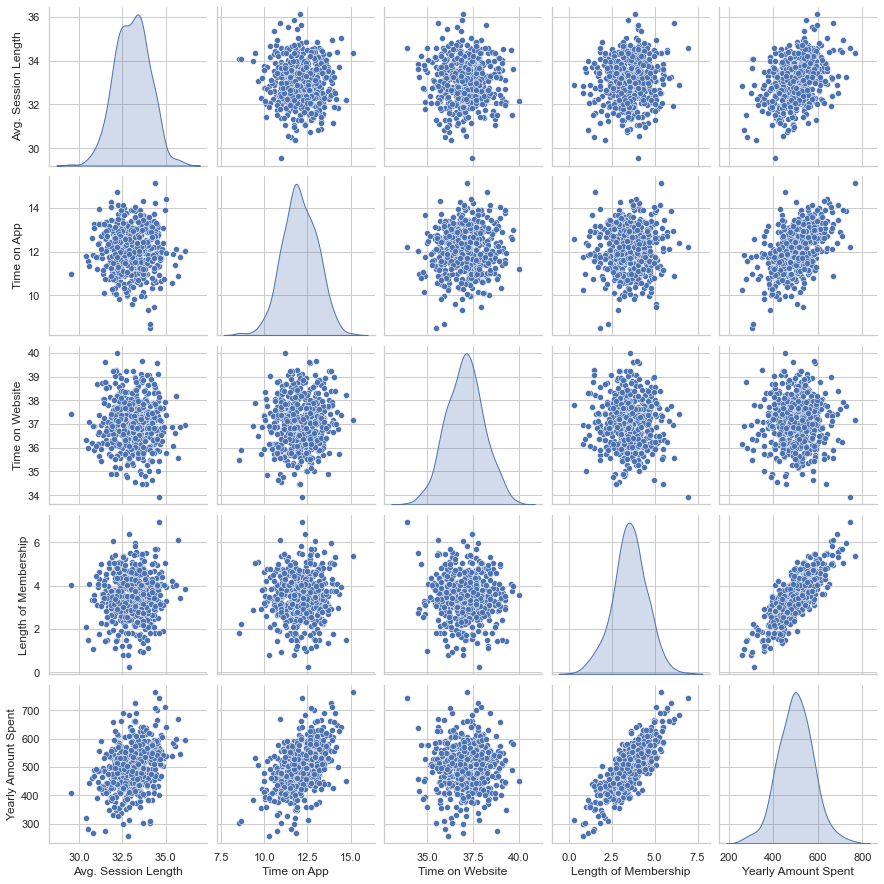

In [10]:
sns.pairplot(data = data, diag_kind = 'kde')

In [11]:
sns.set_palette('Set2')

<AxesSubplot:xlabel='Length of Membership', ylabel='Yearly Amount Spent'>

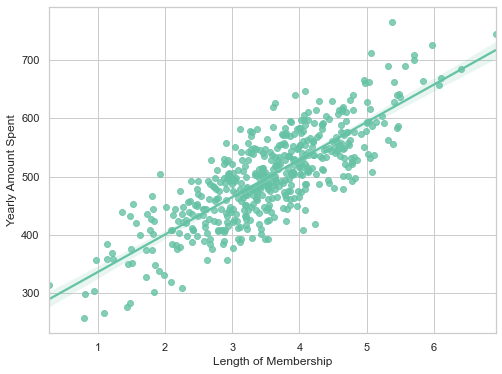

In [12]:
sns.regplot(data = data, x = 'Length of Membership', y = 'Yearly Amount Spent')

### 4. Model 

In [13]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [14]:
model_data = data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']]

X = model_data.drop('Yearly Amount Spent', axis = 1)
y = model_data['Yearly Amount Spent']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
lm = LinearRegression().fit(X_train, y_train)
pls = PLSRegression().fit(X_train, y_train)
ridge = Ridge().fit(X_train, y_train)
lasso = Lasso().fit(X_train, y_train)
elasticnet = ElasticNet().fit(X_train, y_train)
knnr = KNeighborsRegressor().fit(X_train, y_train)
cartr = DecisionTreeRegressor(random_state=42).fit(X_train, y_train)
baggr = BaggingRegressor(random_state=42,bootstrap_features=True,verbose=False).fit(X_train, y_train)
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(X_train, y_train)
gbmr = GradientBoostingRegressor(verbose=False).fit(X_train, y_train)
xgbr = XGBRegressor().fit(X_train, y_train)
lgbmr = LGBMRegressor().fit(X_train, y_train)
catbr = CatBoostRegressor(verbose=False).fit(X_train, y_train)

In [17]:
models = [lm,pls,ridge,lasso,elasticnet,knnr,
         cartr,baggr,rfr,gbmr,xgbr,lgbmr,catbr]

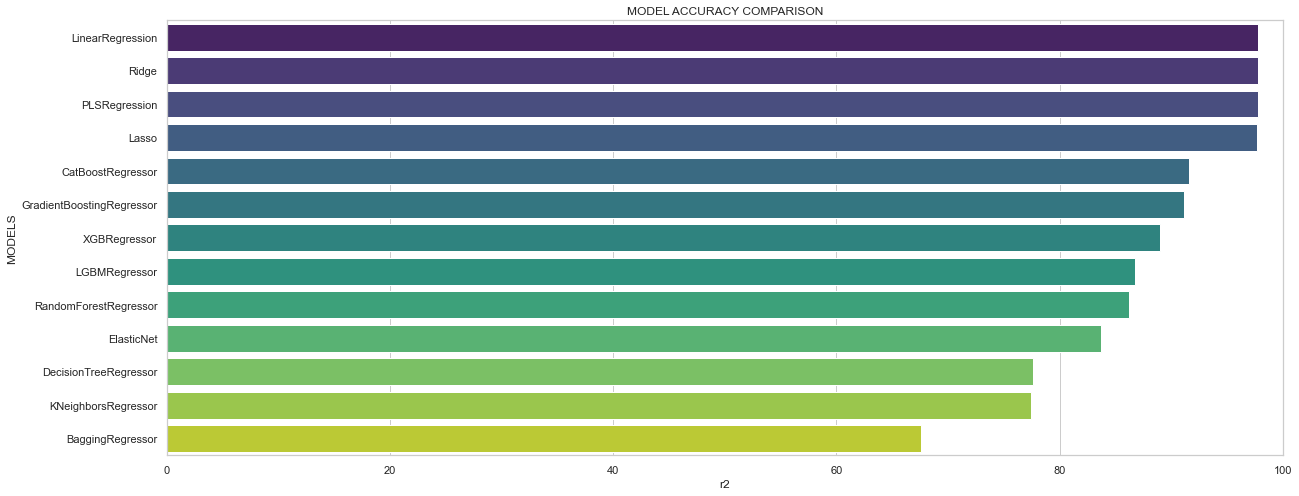

,MODELS,r2
0,LinearRegression,97.744707
0,Ridge,97.742759
0,PLSRegression,97.733561
0,Lasso,97.694078
0,CatBoostRegressor,91.572696
0,GradientBoostingRegressor,91.112390
0,XGBRegressor,89.038748
0,LGBMRegressor,86.769330
0,RandomForestRegressor,86.247002
0,ElasticNet,83.663424


In [18]:
sc = pd.DataFrame(columns=["MODELS","r2"])
for model in models:
    name = model.__class__.__name__
    r2 = cross_val_score(model,X_test,y_test,cv=10,scoring="r2").mean()
    result = pd.DataFrame([[name,r2*100]],columns=["MODELS","r2"])
    sc = sc.append(result)
    sc = sc.sort_values('r2', ascending = False)
    
figure = plt.figure(figsize=(20,8))   
sns.barplot(x="r2",y="MODELS",data=sc, palette = 'viridis')
plt.xlabel("r2")
plt.ylabel("MODELS")
plt.xlim(0,100)
plt.title("MODEL ACCURACY COMPARISON")
plt.show()

display(sc)


In [19]:
linear = LinearRegression()

In [20]:
linear.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = linear.predict(X_test)
y_train_predict = linear.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))
print("\n")

# model evaluation for testing set
y_test_predict = linear.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print('RMSE is {}'.format(rmse))


The model performance for training set
--------------------------------------
R2 score is 0.9854085989105928
RMSE is 9.820231661632778


The model performance for testing set
--------------------------------------
R2 score is 0.9808757641125855
RMSE is 10.19389726086317


In [22]:
linear.intercept_

-1050.6536746645716

In [23]:
temp = pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
temp.head(20)

,Actual,Predict
361,401.033135,403.669931
73,534.777188,542.577563
374,418.602742,427.065917
155,503.978379,502.024604
104,410.069611,410.121436
394,557.608262,569.934425
377,538.941975,531.934313
124,514.336558,506.296510
68,408.620188,408.718707
450,475.015407,473.977371


<AxesSubplot:xlabel='Actual', ylabel='Predict'>

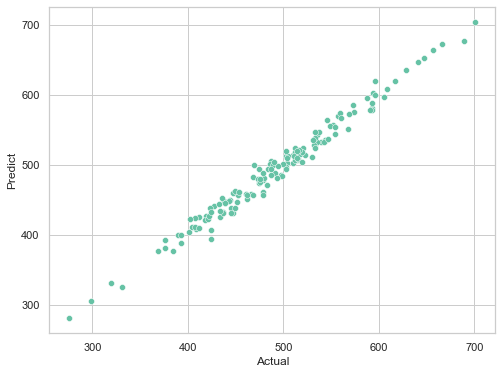

In [24]:
sns.scatterplot(data = temp, x = 'Actual', y = 'Predict', palette=['green','blue'])

In [25]:

coeff = pd.DataFrame({'Features' : X.columns, 'Coefficient' : linear.coef_})
coeff = coeff.sort_values('Coefficient', ascending = False)
coeff

,Features,Coefficient
3,Length of Membership,61.674732
1,Time on App,38.597135
0,Avg. Session Length,25.724256
2,Time on Website,0.459148


In [26]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.42609164143213
MSE: 103.91554136503366
RMSE: 10.19389726086317
